## Demo PulseBuilder

In [3]:
from pyHegel import *
from pyHegel.commands import *
from pyHegel.instruments import *

awg = instruments.tektronix.tektronix_AWG('TCPIP0::AWG5200-XXXX.mshome.net::inst0::INSTR')
#rto = instruments.rohdeschwarz.rs_rto_scope('USB0::0x0AAD::0x0197::1329.7002k14-300206::INSTR')

Fixing mpl_toolkit log scale transform bug of 2.2.x


C:\Codes\QIQSS-CODE\CodePulse\v4
Running under ipython
Running under ipython remote kernel
setting qApp
Redirecting __stderr__ for spyder
Enabling qt5 gui loop handling in ipython


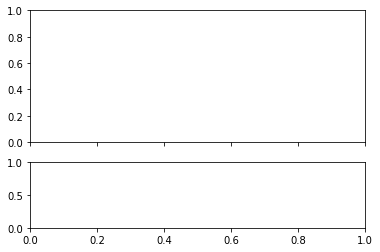

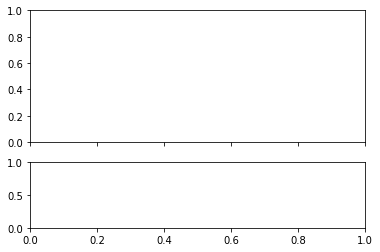

1e-05
1.388888888888889e-05
1.777777777777778e-05
2.1666666666666667e-05
2.5555555555555554e-05
2.9444444444444448e-05
3.3333333333333335e-05
3.722222222222222e-05
4.111111111111111e-05
4.5e-05


In [2]:
# Launch PulseBuilder the first time.
# Build a pulse and export to code
%cd "C:\Codes\QIQSS-CODE\CodePulse\v4\"
%run -i pulsebuilder.py

In [4]:
%cd "C:/Codes/QIQSS-CODE/CodePulse/v4"
%run -i src/Model.py
## Code generated from PulseBuilder ##
SR = 10000.0
segment_0 = Segment(duration=0.002, offset=0.005, mark=(0, 0), waveform=None, envelope=None, sweep_dict={'waveform': {}}) 
segment_1 = Segment(duration=0.007, offset=0.0025, mark=(0, 0.5), waveform=None, envelope=None, sweep_dict={'waveform': {}, 'offset': (0.0, 0.005)}) 
segment_2 = Segment(duration=0.007, offset=0, mark=(0, 0), waveform=None, envelope=None, sweep_dict={'waveform': {}}) 
pulse = Pulse(*[segment_0, segment_1, segment_2])
nb_rep = 10
compensate = 0.0
sequence = pulse.genSequence(nb_rep=nb_rep, compensate=compensate)
# To plot:
#plotPulse(pulse, SR)
#plotPulse(sequence, SR, superpose=False)
# To reload:
#%run -i pulsebuilder.py
#pb.loadPulse(pulse, nb_rep=nb_rep, compensate=compensate)


C:\Codes\QIQSS-CODE\CodePulse\v4


In [7]:
# Get our generated sequence and upload it
AWG_SR = 3200
WV_NAME = 'elzerman'

wav = sequence.getWaveNormalized(AWG_SR)
marks = sequence.getMarks(AWG_SR, val_low=-1, val_high=1)
awg.waveform_create(wav,
                    WV_NAME,
                    sample_rate=AWG_SR,
                    amplitude=0.750,
                    force=True)
awg.waveform_marker_data.set(marks,
                             wfname=WV_NAME)
awg.current_wfname.set(WV_NAME)


Waveform elzerman was deleted
Waveform elzerman was created
